## Tree-based Methods in Scikit-Learn:  Regression and Classification

Let's use the iris dataset (duh) to compare some models.  For very in-depth further reading, see [this article](http://www.d.umn.edu/~rmaclin/publications/opitz-jair99.pdf) for a comparison of various ensemble methods in analysis of the iris and other standard datasets.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier, ExtraTreesClassifier, BaggingRegressor, \
    ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix
import matplotlib.patheffects as path_effects
from matplotlib import cm as cm2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score \
#     confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.cross_validation import train_test_split, KFold, cross_val_score

% matplotlib inline

/Users/Rebecca/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load data:

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

species = pd.Categorical.from_codes(iris.target, iris.target_names)
df['species'] = species

In [3]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Define features and target:

In [4]:
# for our classification models, features are the first four columns and target is the species
X = df.iloc[:, 0:4]
X_scaled = MinMaxScaler().fit_transform(X.astype(float))
X_scaled = pd.DataFrame(X_scaled, columns = ['sepal L', 'sepal W', 'petal L', 'petal W'])

y = df.iloc[:,4]

In [5]:
X_scaled.head(5)

,sepal L,sepal W,petal L,petal W
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [6]:
y[0:5]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

LabelEncoder does the work of codifying our string-type categories for us:

In [7]:
encoder = LabelEncoder()
fit = encoder.fit(y)
y_cats = encoder.transform(y)

In [8]:
y_cats

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Same function as last review to plot the confusion matrix:

In [9]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['setosa', 'versicolor', 'virginica']):
    
    plt.figure(figsize=(12,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True label', fontsize = 18)
    plt.xlabel('Predicted label', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

In [10]:
X_train, X_test, y_train, y_test = \
                        train_test_split(X_scaled, y_cats, test_size=0.33, random_state=42)

### Decision Tree Classifier:

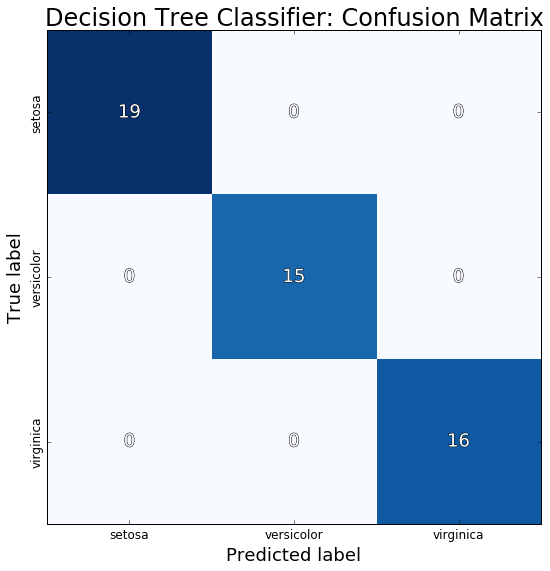

In [11]:
dtc = DecisionTreeClassifier()

y_pred = dtc.fit(X_train, y_train).predict(X_test)

pred1 = dtc.predict_proba(X_train).T[1]

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, title='Decision Tree Classifier: Confusion Matrix')

In [12]:
dt_accuracy = accuracy_score(y_test, y_pred) # (TP + TN) / (P + N)
dt_accuracy

1.0

### Random Forest Classifier:

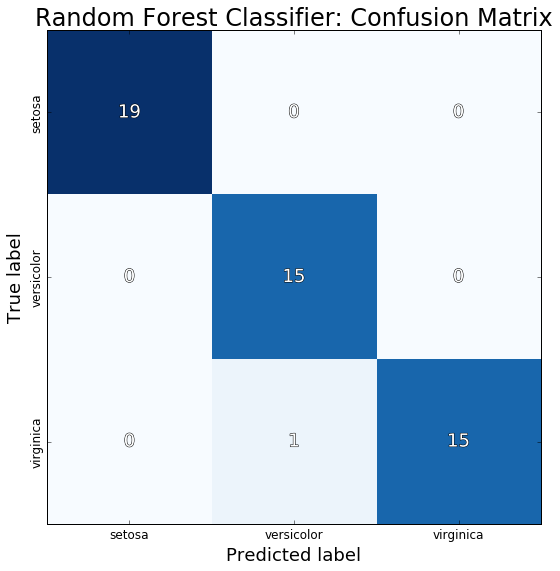

In [13]:
rfc = RandomForestClassifier()

y_pred = rfc.fit(X_train, y_train).predict(X_test)

pred1 = rfc.predict_proba(X_train).T[1]

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, title='Random Forest Classifier: Confusion Matrix')

In [14]:
rf_accuracy = accuracy_score(y_test, y_pred) # (TP + TN) / (P + N)
rf_accuracy

0.97999999999999998

### ADA Boost Classifier:

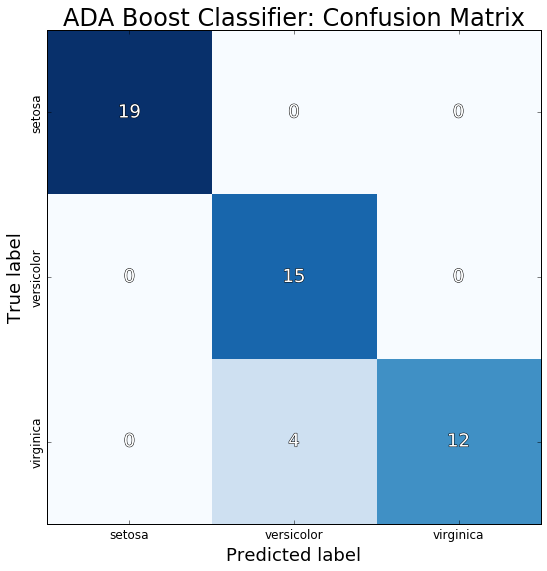

In [15]:
abc = AdaBoostClassifier()

y_pred = abc.fit(X_train, y_train).predict(X_test)

pred1 = abc.predict_proba(X_train).T[1]

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, title='ADA Boost Classifier: Confusion Matrix')

In [16]:
ab_accuracy = accuracy_score(y_test, y_pred) # (TP + TN) / (P + N)
ab_accuracy

0.92000000000000004

### Gradient Boosting Classifier:

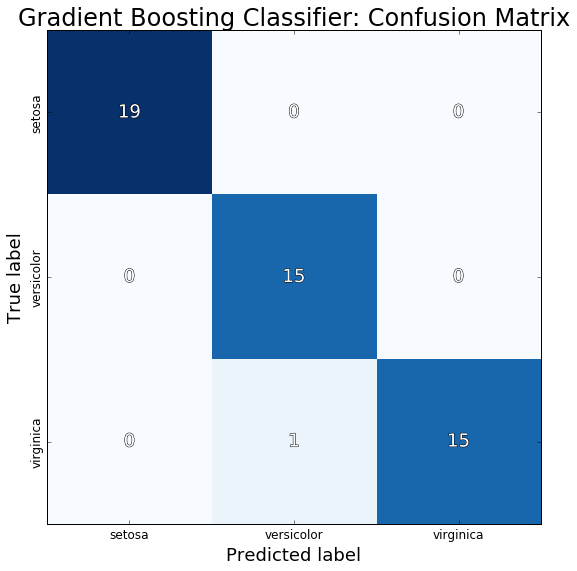

In [17]:
gbc = GradientBoostingClassifier()

y_pred = gbc.fit(X_train, y_train).predict(X_test)

pred1 = gbc.predict_proba(X_train).T[1]

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, title='Gradient Boosting Classifier: Confusion Matrix')

In [18]:
gb_accuracy = accuracy_score(y_test, y_pred) # (TP + TN) / (P + N)
gb_accuracy

0.97999999999999998

### Extra Trees Classifier:

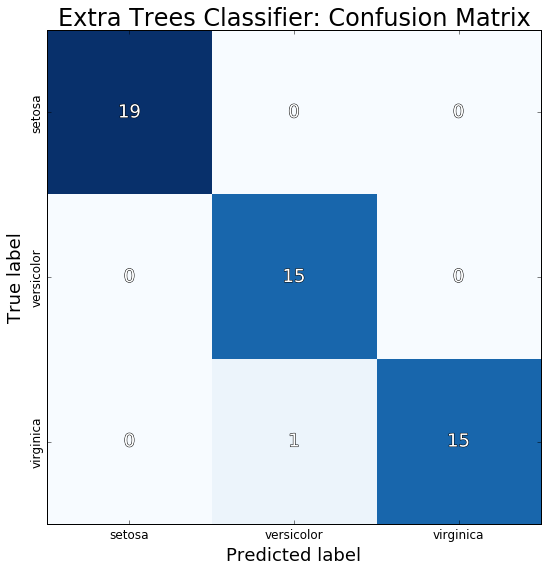

In [19]:
etc = ExtraTreesClassifier()

y_pred = etc.fit(X_train, y_train).predict(X_test)

pred1 = etc.predict_proba(X_train).T[1]

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, title='Extra Trees Classifier: Confusion Matrix')

In [20]:
et_accuracy = accuracy_score(y_test, y_pred) # (TP + TN) / (P + N)
et_accuracy

0.97999999999999998

### How to choose a model?

In [21]:
accuracy_dict = {
    "decision tree" : dt_accuracy,
    "extra trees" : et_accuracy,
    "ADA boost" : ab_accuracy,
    "random forest" : rf_accuracy
    }
acc = pd.DataFrame.from_dict(accuracy_dict, orient = 'index')
acc.columns = ['accuracy score']
acc = acc.sort_values(by = 'accuracy score', ascending = False)
acc

,accuracy score
decision tree,1.00
random forest,0.98
extra trees,0.98
ADA boost,0.92


Here, we've only calculated the accuracy score; in order to pick a model, you must choose which performance measure you would like to maximize [minimize].

### Tree-based Regression Models:

First, we need a numeric target!  Here we use a different method to dummify the species column and then choose sepal length as the target:

In [23]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df = pd.concat([df.drop(['species'], axis = 1), pd.get_dummies(df['species'])], axis = 1)
del df['setosa']
df.columns = ['sepal L', 'sepal W', 'petal L', 'petal W', 'versicolor', 'virginica']
df['intercept'] = 1
df.head(5) 

,sepal L,sepal W,petal L,petal W,versicolor,virginica,intercept
0,5.1,3.5,1.4,0.2,0.0,0.0,1
1,4.9,3.0,1.4,0.2,0.0,0.0,1
2,4.7,3.2,1.3,0.2,0.0,0.0,1
3,4.6,3.1,1.5,0.2,0.0,0.0,1
4,5.0,3.6,1.4,0.2,0.0,0.0,1


In [25]:
# features are sepal width, petal length, petal width, and two of three species dummies 
# target is sepal length

X2 = df.iloc[:, 1:7]
X2_scaled = MinMaxScaler().fit_transform(X2.astype(float))
X2_scaled = pd.DataFrame(X2_scaled, columns = X2.columns[0:len(X2.columns)])

y2 = df.iloc[:,0]

In [26]:
n = 150
plot_colors = []
for i in range(0, 256, 256/n):
    plot_colors.append(cm2.Accent(i))

cv = KFold(len(X2), n_folds = n, shuffle=False)


def do_plot(model, m=None):
    for fold, color in zip(cv, plot_colors):
        X_train = X2_scaled.iloc[fold[0]]
        X_test  = X2_scaled.iloc[fold[1]]
        y_train = y2.iloc[fold[0]]
        y_test  = y2.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
                
        plt.scatter(y_pred, y_test, color=color)
        plt.plot([4,8],[4,8], linewidth = 0.3)
        plt.text(4.5,7.75, "R^2: "+str(m), fontsize=20)
        plt.ylim([4,8.1])
        plt.xlim([4,8.1])
    return 

### Decision Tree Regressor:

In [27]:
dtr = DecisionTreeRegressor()

scores = cross_val_score(dtr, X2_scaled, y2, cv=cv)
scores.mean()

0.10000000000000001

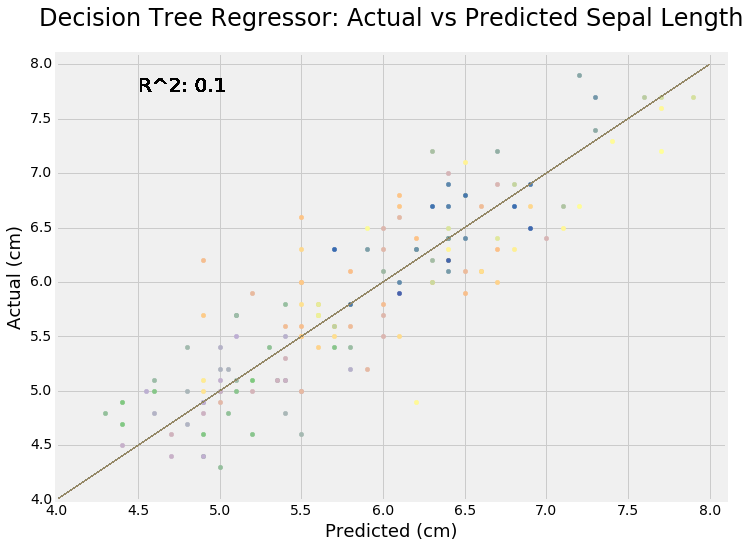

In [28]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted (cm)', fontsize = 18)
plt.ylabel('Actual (cm)', fontsize = 18)
plt.title('Decision Tree Regressor: Actual vs Predicted Sepal Length', fontsize = 24, y = 1.05)

do_plot(dtr, scores.mean().round(2))

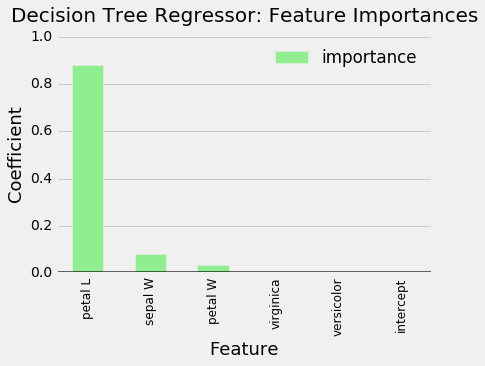

In [29]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

model = dtr
name = 'Decision Tree Regressor'

model.fit(X2_scaled, y2)

features = sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), \
                      X2_scaled.columns), reverse=True)
features_dtr = pd.DataFrame(features, columns = ['importance', 'feature'])
features_dtr = features_dtr.sort_values(by = 'importance', ascending = False)
features_dtr = features_dtr.set_index('feature', drop = True)

features_dtr[0:].plot.bar(color = 'lightgreen')

plt.title(str(name + ': Feature Importances'), fontsize = 20, y = 1.03)

# y label
plt.ylabel('Coefficient', fontsize = 18)
plt.ylim([0,1.01])

# x label
plt.xlabel('Feature', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation = 90, fontsize = 12)

plt.grid(which = 'major', axis = 'x')

plt.show()

### Bagging Regressor:

In [30]:
br = BaggingRegressor()

scores = cross_val_score(br, X2_scaled, y2, cv=cv)
scores.mean()

0.0

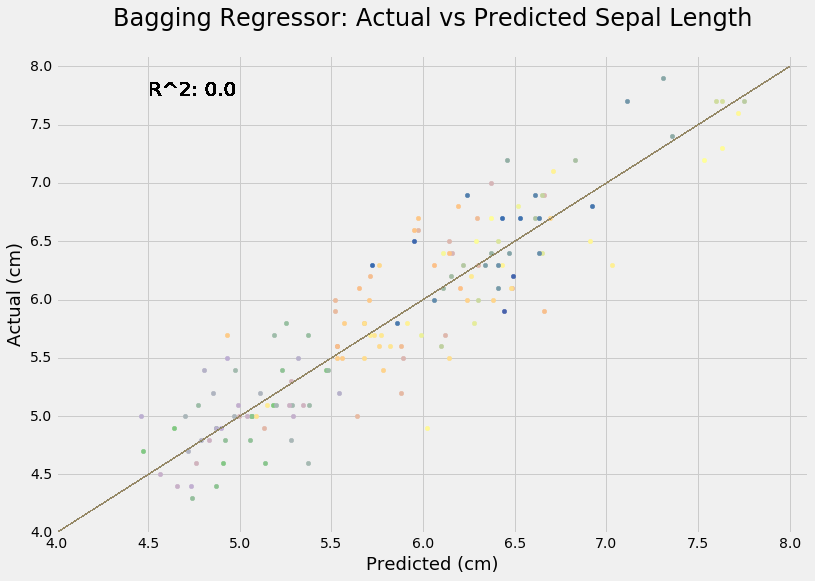

In [31]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted (cm)', fontsize = 18)
plt.ylabel('Actual (cm)', fontsize = 18)
plt.title('Bagging Regressor: Actual vs Predicted Sepal Length', fontsize = 24, y = 1.05)

do_plot(br, scores.mean().round(2))

### Extra Trees Regressor:

In [32]:
etr = ExtraTreesRegressor()

scores = cross_val_score(etr, X2_scaled, y2, cv=cv)
scores.mean()

0.0066666666666666671

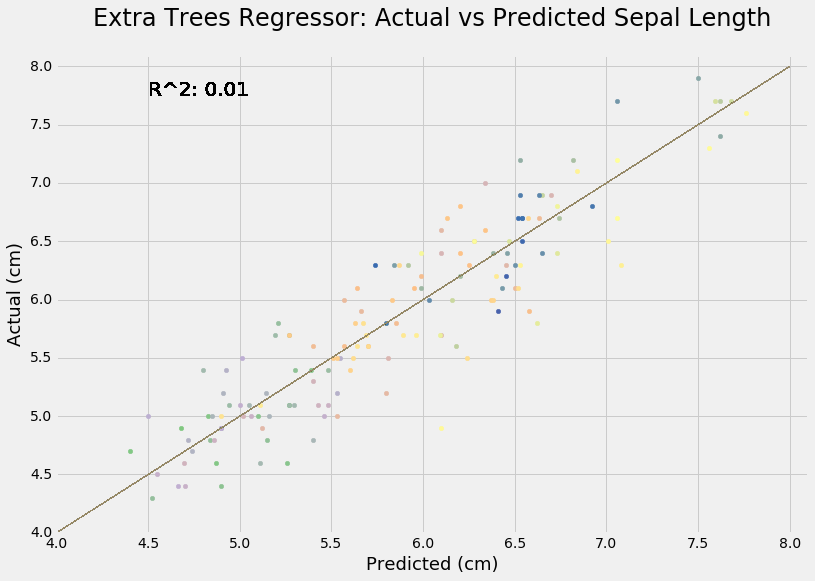

In [33]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted (cm)', fontsize = 18)
plt.ylabel('Actual (cm)', fontsize = 18)
plt.title('Extra Trees Regressor: Actual vs Predicted Sepal Length', fontsize = 24, y = 1.05)

do_plot(etr, scores.mean().round(2))

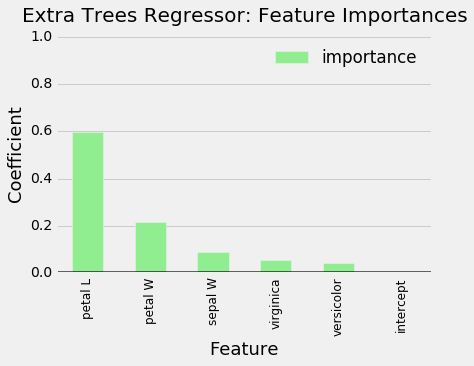

In [34]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

model = etr
name = 'Extra Trees Regressor'

model.fit(X2_scaled, y2)

features = sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), \
                      X2_scaled.columns), reverse=True)
features_etr = pd.DataFrame(features, columns = ['importance', 'feature'])
features_etr = features_etr.sort_values(by = 'importance', ascending = False)
features_etr = features_etr.set_index('feature', drop = True)

features_etr[0:].plot.bar(color = 'lightgreen')

plt.title(str(name + ': Feature Importances'), fontsize = 20, y = 1.03)

# y label
plt.ylabel('Coefficient', fontsize = 18)
plt.ylim([0,1.01])

# x label
plt.xlabel('Feature', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation = 90, fontsize = 12)

plt.grid(which = 'major', axis = 'x')

plt.show()

### ADA Boost Regressor:

In [35]:
abr = AdaBoostRegressor()

scores = cross_val_score(abr, X2_scaled, y2, cv=cv)
scores.mean()

0.0066666666666666671

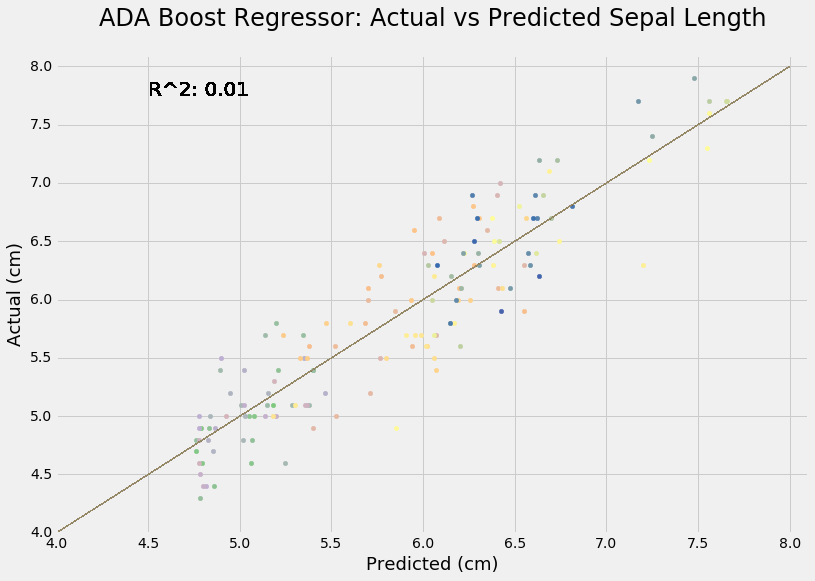

In [36]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted (cm)', fontsize = 18)
plt.ylabel('Actual (cm)', fontsize = 18)
plt.title('ADA Boost Regressor: Actual vs Predicted Sepal Length', fontsize = 24, y = 1.05)

do_plot(abr, scores.mean().round(2))

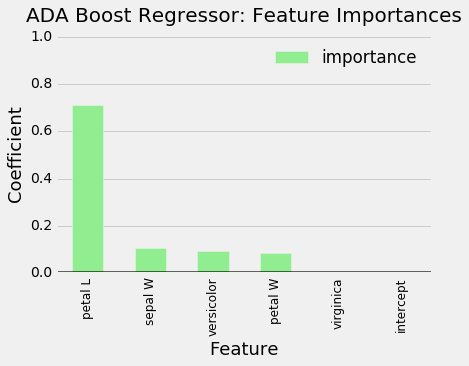

In [37]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

model = abr
name = 'ADA Boost Regressor'

model.fit(X2_scaled, y2)

features = sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), \
                      X2_scaled.columns), reverse=True)
features_abr = pd.DataFrame(features, columns = ['importance', 'feature'])
features_abr = features_abr.sort_values(by = 'importance', ascending = False)
features_abr = features_abr.set_index('feature', drop = True)

features_abr[0:].plot.bar(color = 'lightgreen')

plt.title(str(name + ': Feature Importances'), fontsize = 20, y = 1.03)

# y label
plt.ylabel('Coefficient', fontsize = 18)
plt.ylim([0,1.01])

# x label
plt.xlabel('Feature', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation = 90, fontsize = 12)

plt.grid(which = 'major', axis = 'x')

plt.show()

### Gradient Boosting Regressor:

In [38]:
gbr = GradientBoostingRegressor()

scores = cross_val_score(gbr, X2_scaled, y2, cv=cv)
scores.mean()

0.0

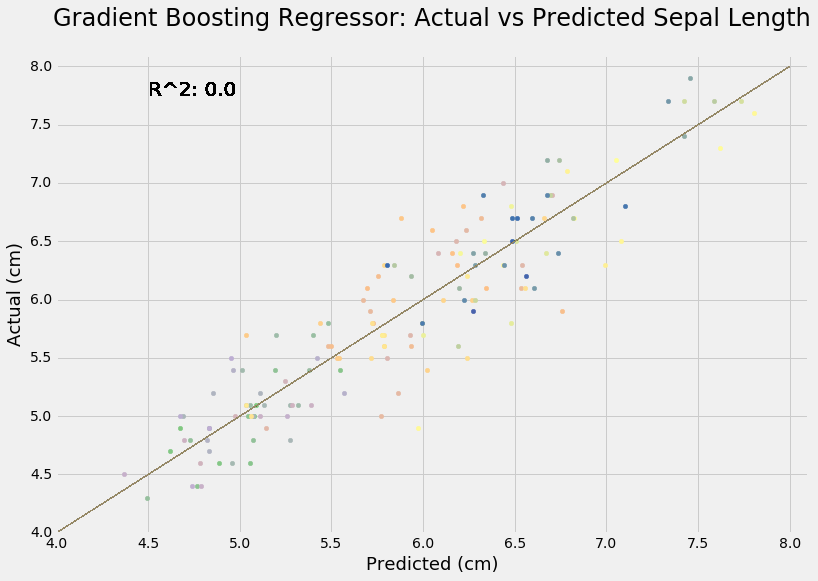

In [39]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted (cm)', fontsize = 18)
plt.ylabel('Actual (cm)', fontsize = 18)
plt.title('Gradient Boosting Regressor: Actual vs Predicted Sepal Length', \
          fontsize = 24, y = 1.05)

do_plot(gbr, scores.mean().round(2))

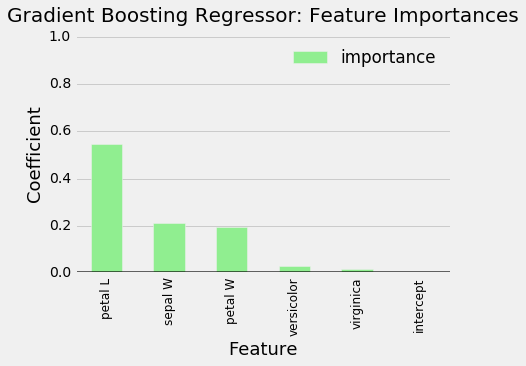

In [40]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

model = gbr
name = 'Gradient Boosting Regressor'

model.fit(X2_scaled, y2)

features = sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), \
                      X2_scaled.columns), reverse=True)
features_gbr = pd.DataFrame(features, columns = ['importance', 'feature'])
features_gbr = features_gbr.sort_values(by = 'importance', ascending = False)
features_gbr = features_gbr.set_index('feature', drop = True)

features_gbr[0:].plot.bar(color = 'lightgreen')

plt.title(str(name + ': Feature Importances'), fontsize = 20, y = 1.03)

# y label
plt.ylabel('Coefficient', fontsize = 18)
plt.ylim([0,1.01])

# x label
plt.xlabel('Feature', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation = 90, fontsize = 12)

plt.grid(which = 'major', axis = 'x')

plt.show()

### Random Forest Regressor:

In [41]:
rfr = RandomForestRegressor()

scores = cross_val_score(rfr, X2_scaled, y2, cv=cv)
scores.mean()

0.0

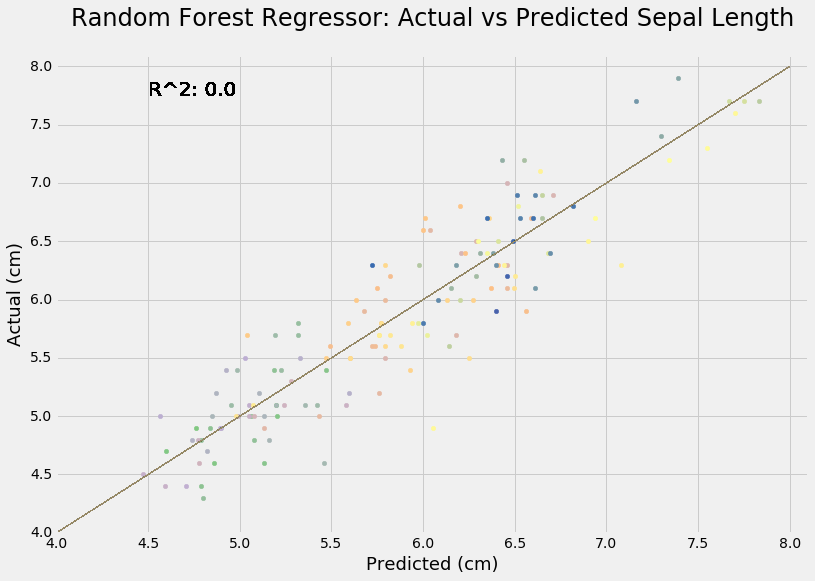

In [42]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.xlabel('Predicted (cm)', fontsize = 18)
plt.ylabel('Actual (cm)', fontsize = 18)
plt.title('Random Forest Regressor: Actual vs Predicted Sepal Length', fontsize = 24, y = 1.05)

do_plot(rfr, scores.mean().round(2))

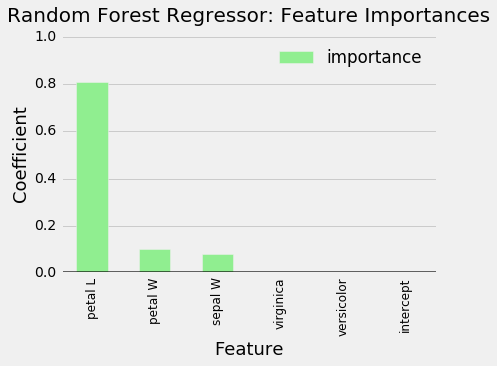

In [43]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

model = rfr
name = 'Random Forest Regressor'

model.fit(X2_scaled, y2)

features = sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), \
                      X2_scaled.columns), reverse=True)
features_rfr = pd.DataFrame(features, columns = ['importance', 'feature'])
features_rfr = features_rfr.sort_values(by = 'importance', ascending = False)
features_rfr = features_rfr.set_index('feature', drop = True)

features_rfr[0:].plot.bar(color = 'lightgreen')

plt.title(str(name + ': Feature Importances'), fontsize = 20, y = 1.03)

# y label
plt.ylabel('Coefficient', fontsize = 18)
plt.ylim([0,1.01])

# x label
plt.xlabel('Feature', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation = 90, fontsize = 12)

plt.grid(which = 'major', axis = 'x')

plt.show()

Write a function to cumulatively sum the variance explained when adding additional model features in order of decreasing importance (i.e., the first feature considered in each model is not necessarily the same feature as in another model; it is the feature which explains the most variance for the model you're considering):

In [44]:
## remind ourselves what this returns
features_dtr

,importance
feature,
petal L,0.8807
sepal W,0.0808
petal W,0.0333
virginica,0.0052
versicolor,0.0000
intercept,0.0000


In [50]:
def TheAccumulator(df1):
    cumulative = []
    total = 0
    for i in range(len(df1)):
        cumulative.append(total)
        total += df1['importance'][i]
    return pd.DataFrame(cumulative, columns = ['sum'], index = df1.index)

In [51]:
## see what the function return looks like
TheAccumulator(features_dtr)

,sum
feature,
petal L,0.0000
sepal W,0.8807
petal W,0.9615
virginica,0.9948
versicolor,1.0000
intercept,1.0000


In [53]:
features_dtr2 = pd.concat([features_dtr, TheAccumulator(features_dtr)], \
                          axis = 1).sort_values(by = 'sum')
features_dtr2

,importance,sum
feature,,
petal L,0.8807,0.0000
sepal W,0.0808,0.8807
petal W,0.0333,0.9615
virginica,0.0052,0.9948
versicolor,0.0000,1.0000
intercept,0.0000,1.0000


In [55]:
features_etr2 = pd.concat([features_dtr, TheAccumulator(features_etr)], \
                          axis = 1).sort_values(by = 'sum')
features_gbr2 = pd.concat([features_dtr, TheAccumulator(features_gbr)], \
                          axis = 1).sort_values(by = 'sum')
features_abr2 = pd.concat([features_dtr, TheAccumulator(features_abr)], \
                          axis = 1).sort_values(by = 'sum')
features_rfr2 = pd.concat([features_dtr, TheAccumulator(features_rfr)], \
                          axis = 1).sort_values(by = 'sum')

Plot the cumulative variances explained for each regression model:

In [57]:
features_dtr2

,importance,sum
feature,,
petal L,0.8807,0.0000
sepal W,0.0808,0.8807
petal W,0.0333,0.9615
virginica,0.0052,0.9948
versicolor,0.0000,1.0000
intercept,0.0000,1.0000


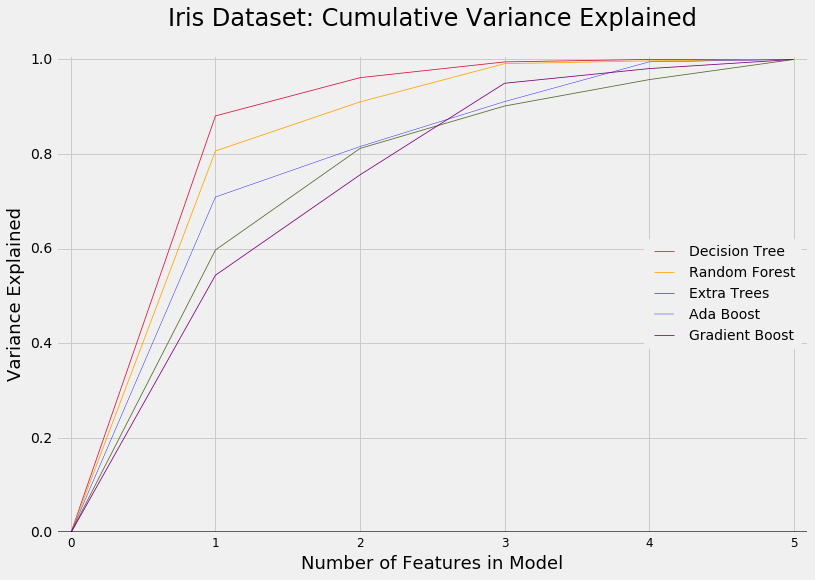

In [61]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.plot(range(6), features_dtr2['sum'], color = 'Crimson', linewidth = 0.8, \
         label = 'Decision Tree')
plt.plot(range(6), features_rfr2['sum'], color = 'Orange', linewidth = 0.8, \
         label = 'Random Forest')
plt.plot(range(6), features_etr2['sum'], color = 'DarkOliveGreen', linewidth = 0.8, \
         label = 'Extra Trees')
plt.plot(range(6), features_abr2['sum'], color = 'blue', linewidth = 0.4, \
         label = 'Ada Boost')
plt.plot(range(6), features_gbr2['sum'], color = 'purple', linewidth = 0.8, \
         label = 'Gradient Boost')
plt.axhline(0, color='black', alpha = 0.6)
plt.title('Iris Dataset: Cumulative Variance Explained', fontsize = 24, y = 1.05)

# y label
plt.ylabel('Variance Explained', fontsize = 18)
#plt.yticks([0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05], fontsize = 12)

# x label
plt.xlabel('Number of Features in Model', y = 0.1, fontsize = 18)
plt.xticks(range(0, 6, 1), fontsize = 12)

plt.xlim([-0.1, 5.1])
plt.ylim([0, 1.01])
plt.legend(loc='center right', fontsize = 14)

plt.show()

In [67]:
big_df = pd.concat([features_dtr, features_gbr, features_etr, features_abr, features_rfr], \
                   axis = 1)
big_df.columns = ['Decision Tree', 'Gradient Boost', 'Extra Trees', 'ADA Boost', 'Random Forest']

big_df

,Decision Tree,Gradient Boost,Extra Trees,ADA Boost,Random Forest
intercept,0.0000,0.0000,0.0000,0.0000,0.0000
petal L,0.8807,0.5442,0.5975,0.7094,0.8067
petal W,0.0333,0.1935,0.2145,0.0839,0.1036
sepal W,0.0808,0.2120,0.0896,0.1066,0.0808
versicolor,0.0000,0.0310,0.0426,0.0950,0.0030
virginica,0.0052,0.0193,0.0558,0.0051,0.0059


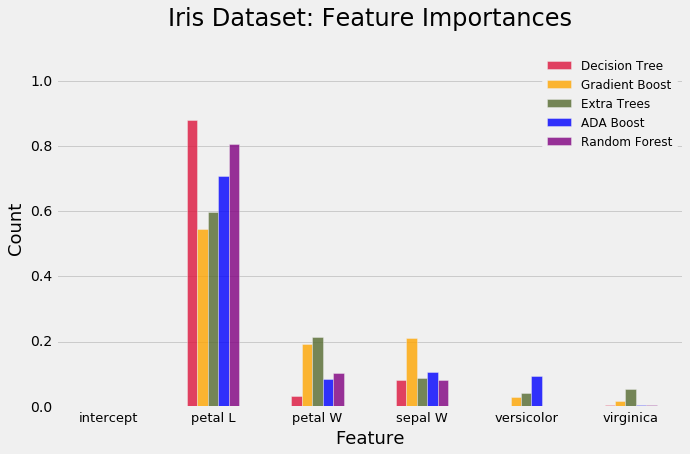

In [72]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#big_ystand = big_ystand.sort('all', ascending = False)
big_df[['Decision Tree', 'Gradient Boost', 'Extra Trees', 'ADA Boost', 'Random Forest']]\
    .plot(kind = 'bar', alpha = 0.8, stacked = False, colors = ['Crimson', 'Orange', \
        'DarkOliveGreen', 'blue', 'purple'], figsize = (10, 6))

plt.title('Iris Dataset: Feature Importances', fontsize = 24, y = 1.05)

# y label
plt.ylabel('Count', fontsize = 18)
#plt.ylim([0, 501])

# x label
plt.xlabel('Feature', fontsize = 18)

# set the figure boundaries
plt.ylim([0, 1.1])

plt.grid(True)
plt.grid(which = 'major', axis = 'x')
plt.legend(loc='upper right', fontsize = 12)
plt.xticks(rotation = 0, fontsize = 13)

plt.axhline(0, color = 'black', linewidth = 0.3)

plt.show()